<a href="https://colab.research.google.com/github/evgeny-kolonsky/Lab4/blob/main/Hall/hot/Hall_hot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab4 Hall effect measurements: heating


Evgeny Kolonsky 2025

v.0.1.5


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.stats import linregress
from scipy.interpolate import interp1d
import requests

In [7]:
# Constants
d = 1e-3 # thikness, m
L = 16e-3 # length between ohmic contacts, m
W = 10e-3 # width, m

# Boltzmann constant
k = 8.625e-5 # eV/K

# Part 0: zero measurements


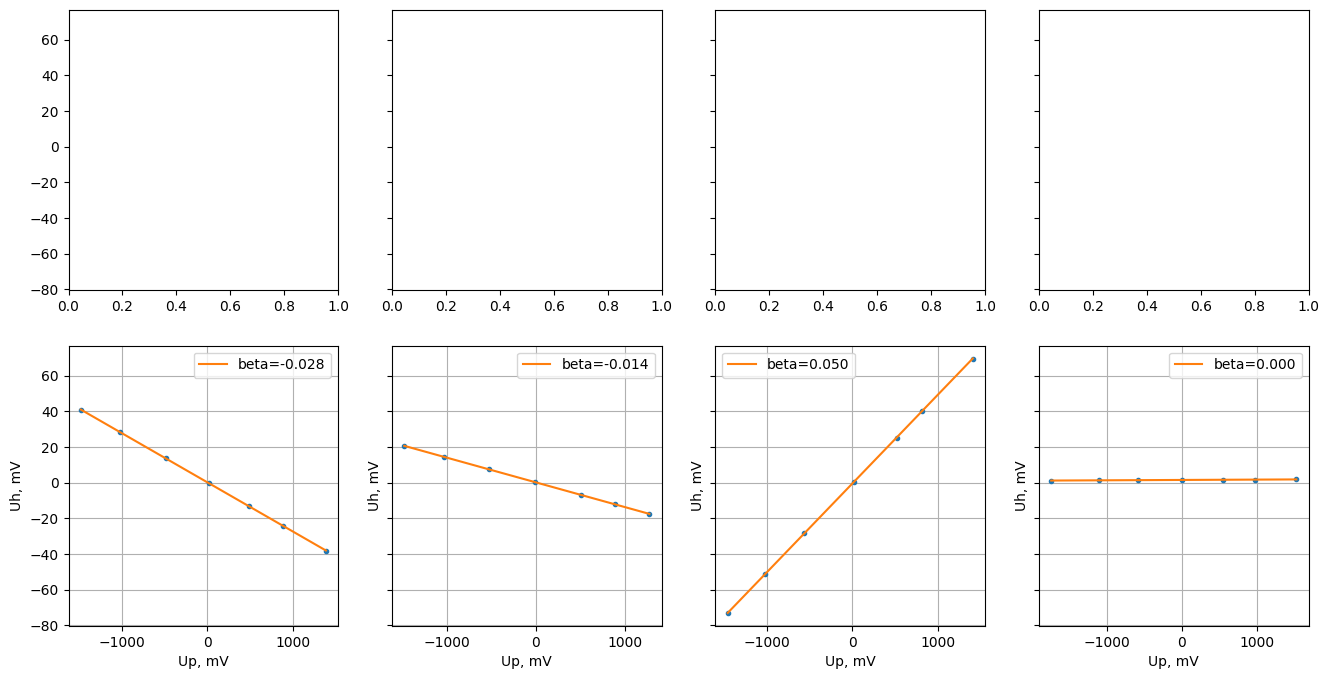

In [5]:
URL = 'https://raw.githubusercontent.com/evgeny-kolonsky/Lab4/refs/heads/main/Hall/hot/'
names = [21, 22, 23, 24]


fig, ax = plt.subplots(2, 4, figsize=(16, 8), sharey=True)

for name in names:
  url = URL+f'zero{name}.txt'
  response = requests.get(url).text
  Ip, T, Uh, Up = np.loadtxt(response.splitlines()).T
  fit = linregress(Up, Uh)
  beta, U0 = fit.slope, fit.intercept

  first_digit = name % 10
  second_digit = name // 10
  axx = ax[second_digit-1, first_digit-1]
  axx.plot(Up, Uh, '.')
  axx.plot(Up, U0 + beta*Up, label=f'{beta=:.3f}')

  axx.set_xlabel('Up, mV')
  axx.set_ylabel('Uh, mV')
  axx.legend()
  axx.grid()


# Part 4: Energy gap from $U_p(T)$



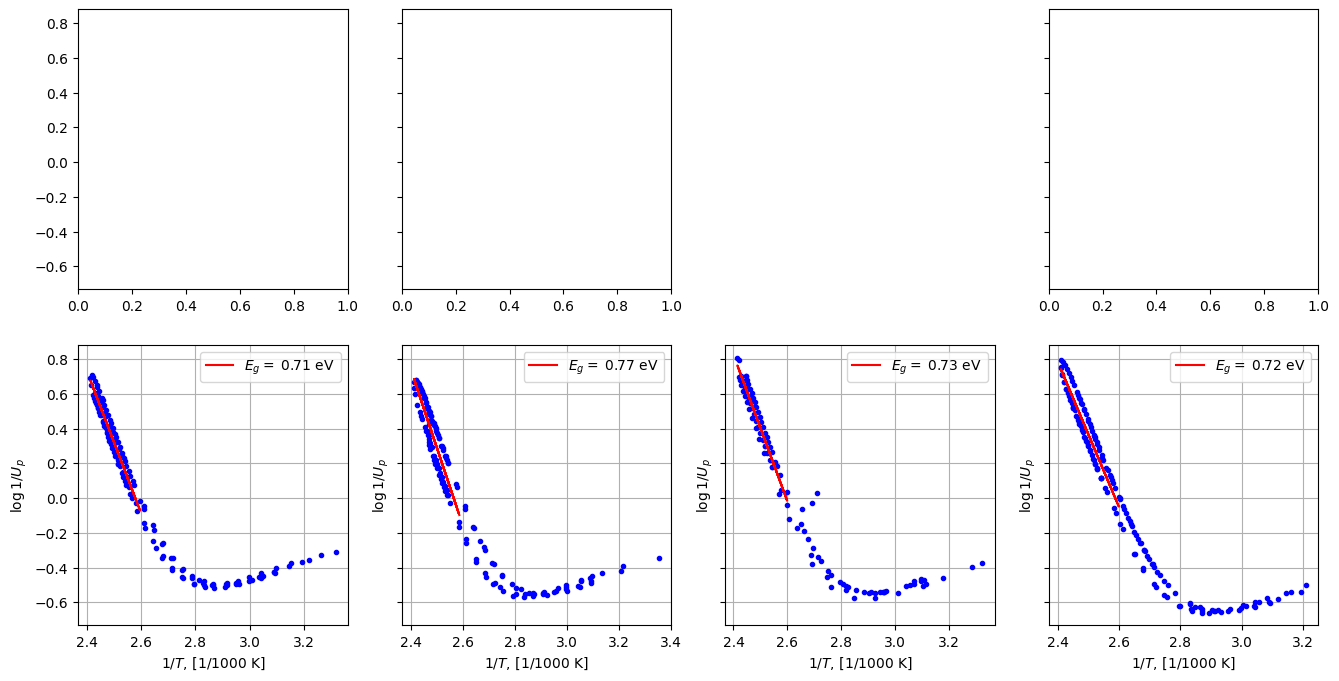

In [8]:
URL = 'https://raw.githubusercontent.com/evgeny-kolonsky/Lab4/refs/heads/main/Hall/hot/'
names = [21, 22, 23, 24]

fig, ax = plt.subplots(2, 4, figsize=(16, 8), sharey=True)

for name in names:
  url = URL + f'zero{name}.txt'
  response = requests.get(url).text
  Ip, T, Uh, Up = np.loadtxt(response.splitlines()).T
  fit = linregress(Up, Uh)
  beta, U0 = fit.slope, fit.intercept

  url = URL + f'{name}.txt'
  response = requests.get(url).text
  T, Uh_, Up = np.loadtxt(response.splitlines()).T
  Uh = Uh_ - beta*Up - U0

  T += 273.15 # C to K
  Up *= 1e-3 # mV to V
  Uh *= 1e-3 # mV to V
  # correction
  first_digit  = name % 10
  second_digit = name // 10
  axx = ax[second_digit-1, first_digit-1]

  x = 1 / T
  y = np.log(1/ Up)
  mask = (x * 1000 < 2.6)
  fit = linregress(x[mask], y[mask])
  y_predicted = fit.intercept + fit.slope * x[mask]
  b = fit.slope
  Eg = -b * 2 * k
  axx.set_xlabel(r'$1/T$, [1/1000 K]')
  axx.set_ylabel(r'$\log 1/U_p$')
  axx.plot(x *1000, y, '.', color='blue')
  axx.plot(x[mask] * 1000, y_predicted, color='red', label=fr'$E_g=$ {Eg:.2f} eV')
  axx.legend()
  axx.grid()
#ax[0,0].remove()
ax[0,2].remove()


# Part 5: Hall voltage as a function of temperature $U_h(T)$

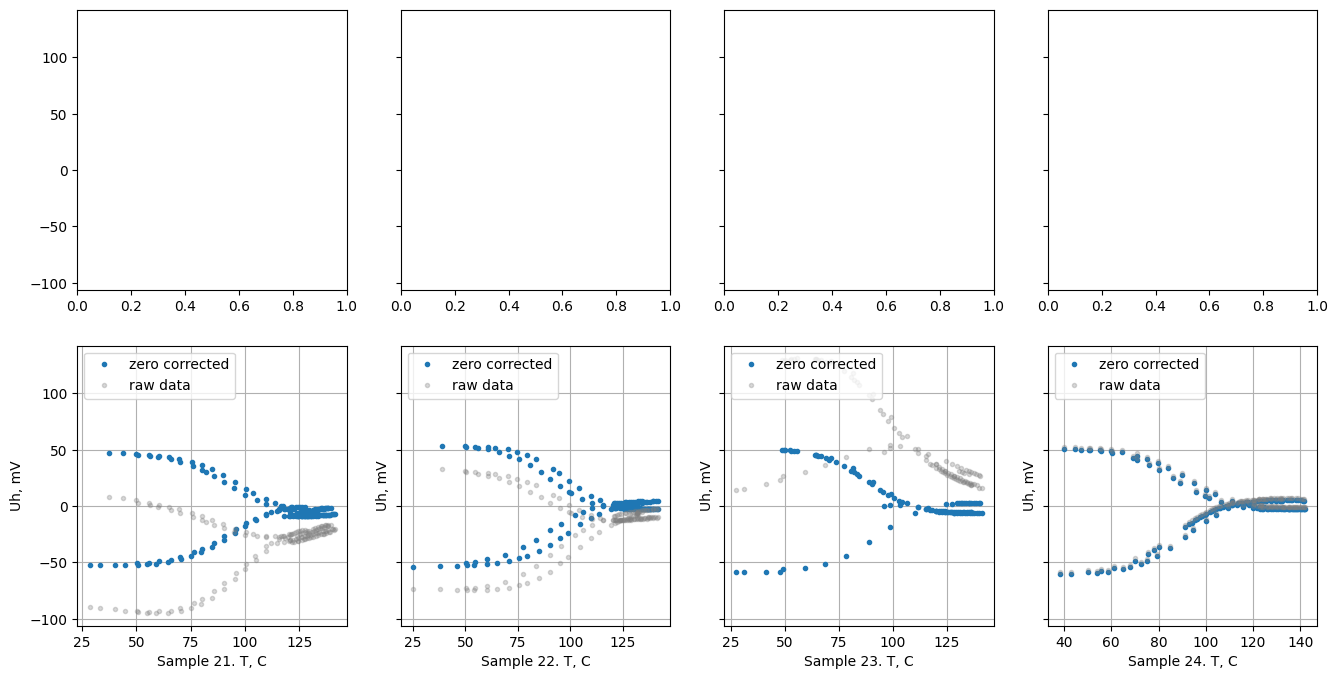

In [4]:
URL = 'https://raw.githubusercontent.com/evgeny-kolonsky/Lab4/refs/heads/main/Hall/hot/'
names = [21, 22, 23, 24]


fig, ax = plt.subplots(2, 4, figsize=(16, 8), sharey=True)

for name in names:

      url = URL + f'zero{name}.txt'
      response = requests.get(url).text
      Ip, T, Uh, Up = np.loadtxt(response.splitlines()).T
      fit = linregress(Up, Uh)
      beta, U0 = fit.slope, fit.intercept

      url = URL + f'{name}.txt'
      response = requests.get(url).text
      T, Uh_, Up = np.loadtxt(response.splitlines()).T
      Uh = Uh_ - beta*Up - U0
      #Uh = Uh_

      first_digit = name % 10
      second_digit = name // 10
      axx = ax[second_digit-1, first_digit-1]
      axx.plot(T, Uh, '.', label=f'zero corrected')
      axx.plot(T, Uh_, '.', color='gray', alpha=0.3, label=f'raw data')

      axx.set_xlabel(f'Sample {name}. T, C')
      axx.set_ylabel('Uh, mV')
      axx.legend(loc='upper left')
      axx.grid()


#